<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220605_titanic_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Titanic dataset에서 결측치를 최빈값으로 대체하시오.

#2. train:test=7:3으로 분할하고(set.seed(2022)) Target을 survived(생존 여부)로 하여
예측하는 분류모델을 3개 이상 생성하고 test data에 대한 예측값을 csv로 제출하시오.
(Xboost 모델 포함)

#3. 3개 모델의 정확도와 ROC커브, AUC값을 산출하여 가장 좋은 모델을 제시하시오.
----------------------------------------------------------------------------

# 1. 라이브러리 및 데이터 로드

In [ ]:
install.packages(c("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","ggplot2","pacman","esquissee"))
pacman::p_load("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","pacman","esquissee")

In [2]:
system("gdown --id 1HN8OY7oNcb6u8J_3h8dfAUGv4x-Qj3_E")

In [111]:
df=read.csv("titanic.csv")

# 2. BASIC EDA

In [5]:
install.packages("esquisse")
library(esquisse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘reactR’, ‘openxlsx’, ‘htmlwidgets’, ‘reactable’, ‘rio’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘datamods’, ‘phosphoricons’, ‘shiny’, ‘shinyWidgets’




In [8]:
#install.packages("DataExplorer")
library(DataExplorer)

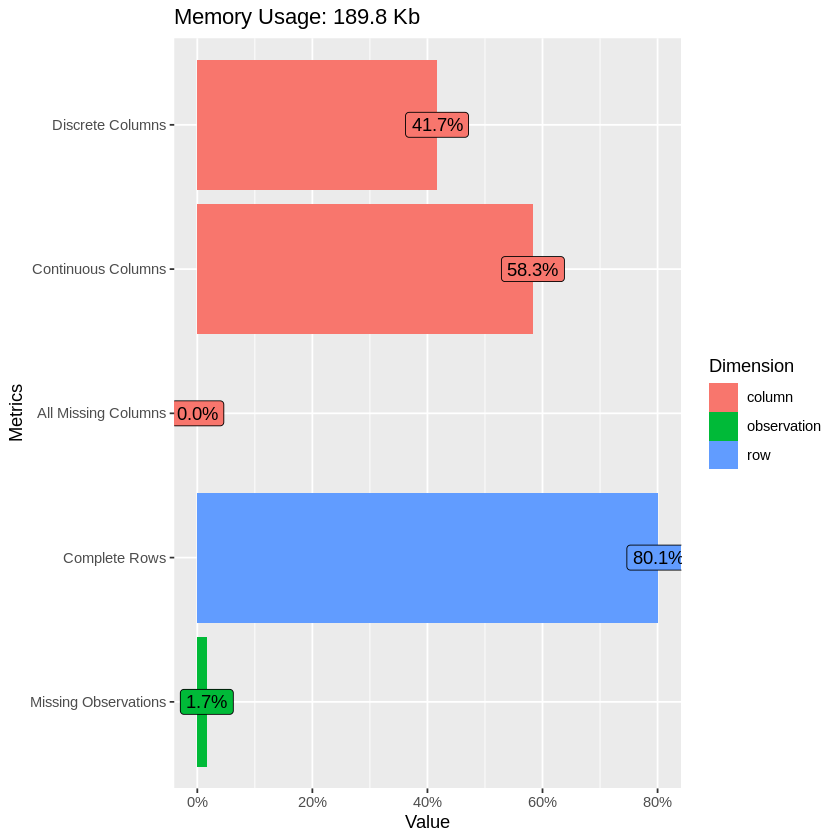

In [9]:
#결측치 확인
plot_intro(df)

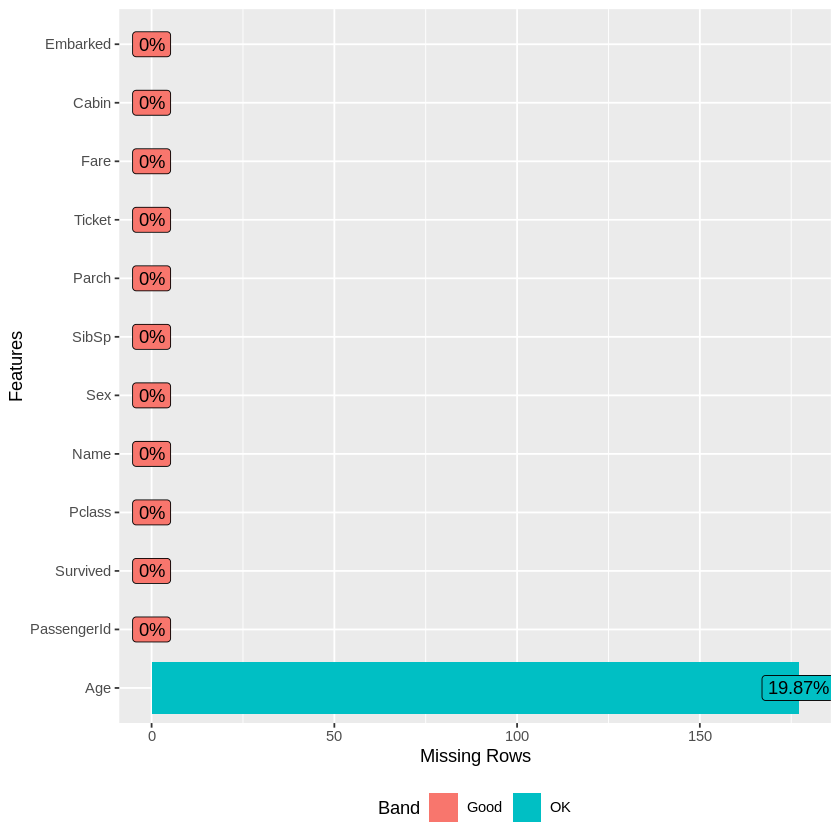

In [10]:
plot_missing(df)

age 변수에 미씽 확인

In [12]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             891   
Number of columns          12    
_______________________          
Column type frequency:           
  character                5     
  numeric                  7     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Name                  0             1  12  82     0      891          0
2 Sex                   0             1   4   6     0        2          0
3 Ticket                0             1   3  18     0      681          0
4 Cabin                 0             1   0  15   687      148          0
5 Embarked              0             1   0   1     2        4          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_vari

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [13]:
summary(df)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [112]:
df$Survived<-as.factor(df$Survived)

3 columns ignored with more than 50 categories.
Name: 891 categories
Ticket: 681 categories
Cabin: 148 categories




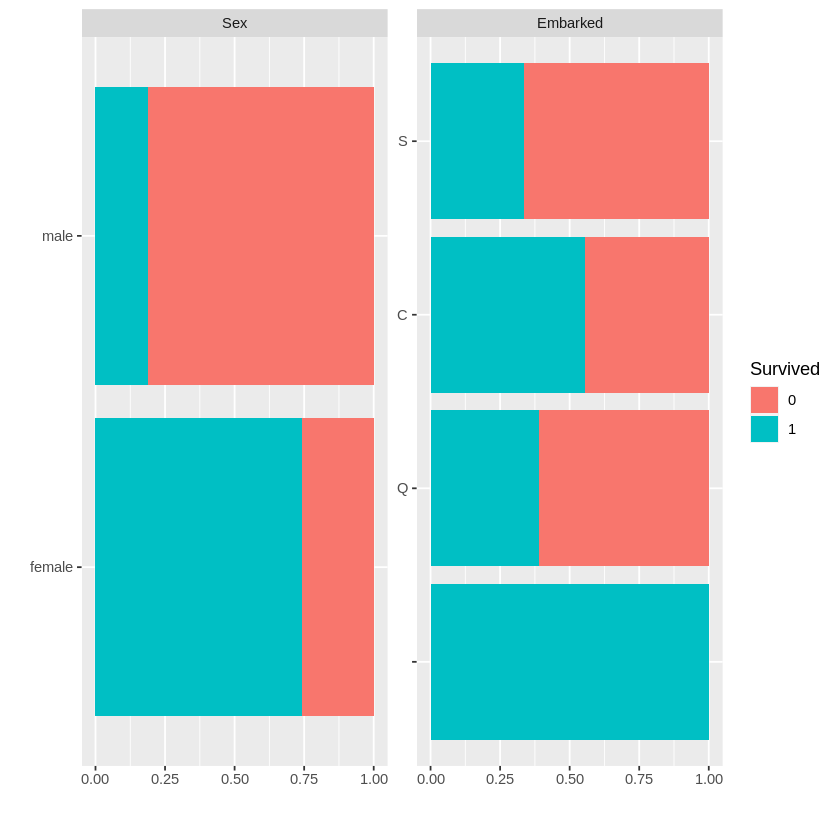

In [27]:
plot_bar(df, by='Survived')

embarked에서도 미씽 확인

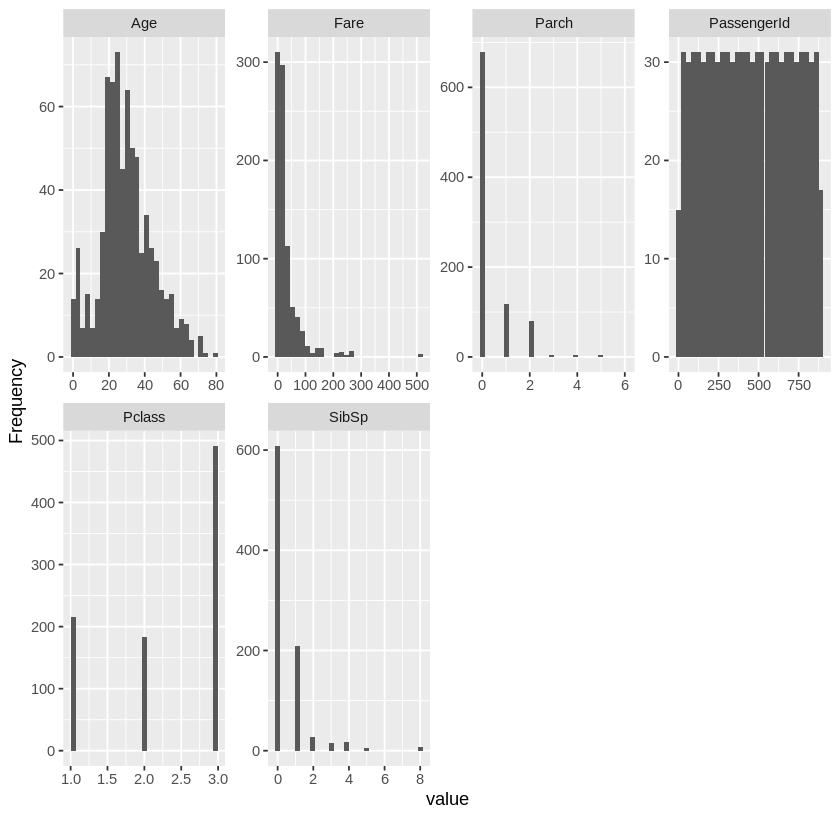

In [28]:
plot_histogram(df)

Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”


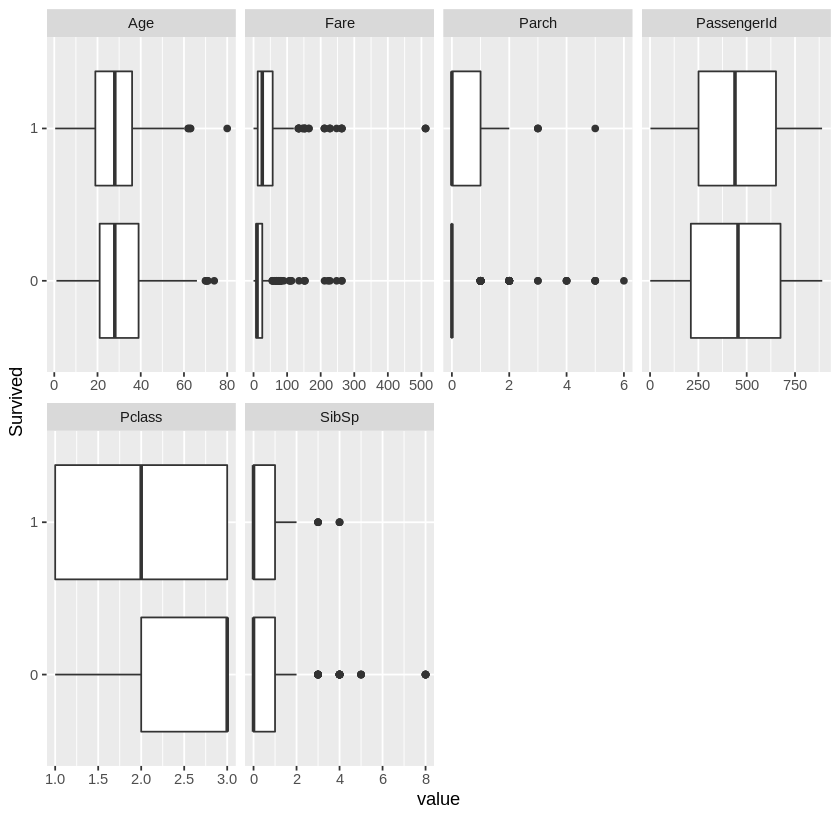

In [29]:
plot_boxplot(df, by = "Survived")

박스플랏만 봤을때는 parce, pclass가 타켓에 영향을 많이 미친듯 함

In [45]:
#esquisser(df)

# 3. FEATURE ENGINEERING

최빈값 결측치로 대체 

In [113]:
#컬럼명 소문자로 변경
names(df)=tolower(df %>% names)

In [48]:
#함수생성
mode= function(x){
  table(x) %>% which.max() %>% names
}

In [114]:
df$age<-ifelse(is.na(df$age), mode(df$age),  df$age)

In [115]:
df$embarked<-ifelse(df$embarked=='', mode(df$embarked),   df$embarked    )

In [78]:
#table(df$embarked) %>% str

 'table' int [1:4(1d)] 2 168 77 644
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:4] "" "C" "Q" "S"


In [87]:
#table(df$embarked) %>% dimnames

[[1]]
[1] ""  "C" "Q" "S"

In [116]:
df$fare<-ifelse(df$fare==0,mode(df$fare), df$fare )

캐릭터 팩터로 변경

In [117]:
df %<>% mutate(across(where(is.character), as.factor))

In [118]:
glimpse(df)

Rows: 891
Columns: 12
$ passengerid <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ survived    <fct> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ name        <fct> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ sex         <fct> male, female, female, female, male, male, male, male, fema…
$ age         <fct> 22, 38, 26, 35, 35, 24, 54, 2, 27, 14, 4, 58, 20, 39, 14, …
$ sibsp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ ticket      <fct> A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330…
$ fare        <fct> 7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075,…
$ cabin       <fct> , C85, , C123, , , E46, , , , G6, C103, , , , , , , , , , …
$ embarked    <fct> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, S, C…


# 4. MODELING

In [103]:
#install.packages("usemodels")
library(usemodels)

In [169]:
ls("package:usemodels", pattern = "use_")

[1] "use_C5.0"             "use_cubist"           "use_earth"           
[4] "use_glmnet"           "use_kernlab_svm_poly" "use_kernlab_svm_rbf" 
[7] "use_kknn"             "use_ranger"           "use_xgboost"

In [119]:
set.seed(2022)
ind=sample(1:nrow(df), nrow(df)*0.7, replace=FALSE)
train=df[ind,]
test=df[-ind,]

In [120]:
use_xgboost(survived~. , data = train)

xgboost_recipe <- 
  recipe(formula = survived ~ ., data = train) %>% 
  step_novel(all_nominal_predictors()) %>% 
  step_dummy(all_nominal_predictors(), one_hot = TRUE) %>% 
  step_zv(all_predictors()) 

xgboost_spec <- 
  boost_tree(trees = tune(), min_n = tune(), tree_depth = tune(), learn_rate = tune(), 
    loss_reduction = tune(), sample_size = tune()) %>% 
  set_mode("classification") %>% 
  set_engine("xgboost") 

xgboost_workflow <- 
  workflow() %>% 
  add_recipe(xgboost_recipe) %>% 
  add_model(xgboost_spec) 

set.seed(22483)
xgboost_tune <-
  tune_grid(xgboost_workflow, resamples = stop("add your rsample object"), grid = stop("add number of candidate points"))



https://velog.io/@highway92/XGBoost-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%EB%93%A4

https://blog.naver.com/sjy5448/222613082311

https://blog.naver.com/rnskdud0526/222710343208

 ##  boost_tree(
    trees = tune(), #트리 모델의 개수
    min_n = tune(), # child 에서 필요한 모든 관측치에 대한 가중치의 최소합
    tree_depth = tune(), # 트리의 최대 깊이,  일반적으로 3~10의 값
    learn_rate = tune(), #eta, default=0.3,학습률, 0~1 사이의 값 지정, 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 보통, 0,01~0.2 사이의 값
    loss_reduction = tune(), 
    sample_size = tune() 
  )

In [121]:
xgboost_recipe <- 
  recipe(formula = survived ~ ., data = train) %>% 
  step_novel(all_nominal_predictors()) %>% 
  step_dummy(all_nominal_predictors(), one_hot = TRUE) %>% 
  step_zv(all_predictors())  %>%
  update_role(passengerid, new_role = "passengerid")

  xgboost_spec <- 
  boost_tree(trees = 100) %>% 
  set_mode("classification") %>% 
  set_engine("xgboost")

  xgboost_workflow <- 
  workflow() %>% 
  add_recipe(xgboost_recipe) %>% 
  add_model(xgboost_spec)

In [108]:
#install.packages("xgboost")
library(xgboost)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [122]:
xgb_fit = xgboost_workflow %>% 
          fit(train)

In [171]:
pred_test = predict(xgb_fit, test[,-2], type = "class")

In [ ]:
#pred_test = predict(xgb_fit, test[,-2], type = "prob")

In [176]:
pred_test %>%str

tibble [268 × 1] (S3: tbl_df/tbl/data.frame)
 $ .pred_class: Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 1 1 ...


In [128]:
#install.packages("caret")
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [178]:
confusionMatrix(pred_test$ .pred_class, test$survived,  positive = '1')  #   Accuracy : 0.7836

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 133  32
         1  26  77
                                          
               Accuracy : 0.7836          
                 95% CI : (0.7294, 0.8314)
    No Information Rate : 0.5933          
    P-Value [Acc > NIR] : 3.231e-11       
                                          
                  Kappa : 0.5476          
                                          
 Mcnemar's Test P-Value : 0.5115          
                                          
            Sensitivity : 0.7064          
            Specificity : 0.8365          
         Pos Pred Value : 0.7476          
         Neg Pred Value : 0.8061          
             Prevalence : 0.4067          
         Detection Rate : 0.2873          
   Detection Prevalence : 0.3843          
      Balanced Accuracy : 0.7715          
                                          
       'Positive' Class : 1               
                              

In [182]:
#install.packages("pROC")
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [183]:
roc_xgb=roc(  as.numeric(pred_test$ .pred_class), as.numeric(test$survived))
auc(roc_xgb)  #0.7768

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Area under the curve: 0.7768